# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
bounds = np.zeros((10,2),dtype = int)
bounds[2,1] = 4
bounds[:, 1].max()

4

In [58]:
# Here is the value of N the rounds
N = 542
# The number of Distributions
d = 10
# The array of the Number of times ad is selected
Nn = [0]* d
# The array of sum of rewards given to selected ad
Rn = [0]* d
# Which ad was selected in each round
selected = []
# The upper and lower bound array of bounding box
bounds = np.zeros((d,2))
#The total number of rewards given
total_R = 0
# The loop for taking rounds
for n in range(N):
    # Making max upper bound as 0
    # The reason of upper bound as 0 as to make the sane comparison
    # as the Bounds tend to descrease with itration
    max_up = 0
    # Selecting the first ad
    ad = 0
    for i in range(d):
        # Checking the Number of times ad is selected is greater than 0
        if Nn[i] > 0:
            # Calculating average reward
            avg_rw = Rn[i]/Nn[i]
            # The delta i or the boundry var
            deltai = math.sqrt(1.5*(math.log(n + 1)/Nn[i]))
            # Specifying the boundary of each ad
            # Also update each boundary with the conf interval
            bounds[i][0] = avg_rw - deltai
            bounds[i][1] = avg_rw + deltai
        else:
            # Making upper bound inf so that there will be no problems as computing
            # To intialize as inf we provide a bound as to maximum for unselected or 
            # Never visited person
            bounds[i][1] = 1e400
        # Most important part is to make the upper bound and select the right ad
        if max_up < bounds[i][1]:
            max_up = bounds[i][1]
            ad = i
    selected.append(ad)
    Nn[ad] = Nn[ad] + 1
    # Giving the reward to each of sucessful task
    Rn[ad] = Rn[ad] + data.values[n,ad]
    # The total rewards given totally
    total_R = total_R + data.values[n, ad]

## Visualising the results

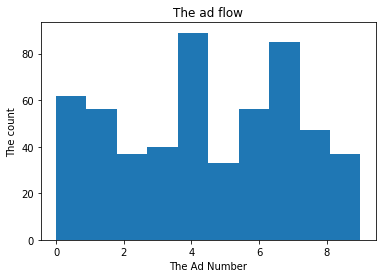

In [59]:
plt.hist(selected)
plt.title('The ad flow')
plt.xlabel('The Ad Number')
plt.ylabel('The count')
plt.show()

In [60]:
Rn.index(max(Rn))

4

In [61]:
df = pd.DataFrame(bounds)
df['index'] = df.index

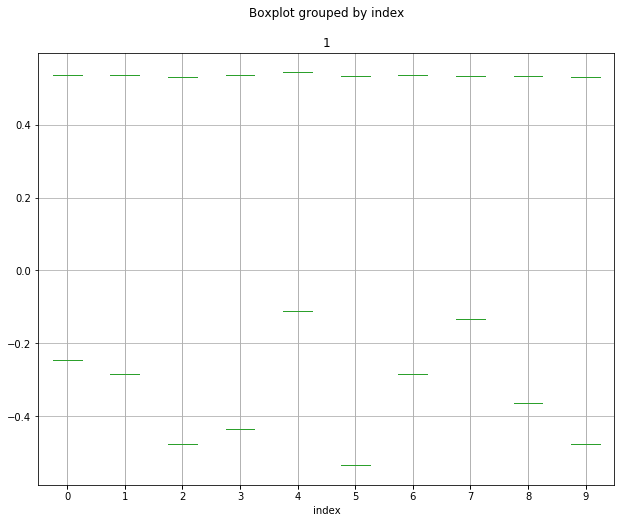

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=[0],by='index',ax= ax)
df.boxplot(column=[1],by='index',ax= ax)
plt.show()

In [63]:
Nn

[62, 56, 37, 40, 89, 33, 56, 85, 47, 37]